<h2>Code for Both</h2>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.pyplot import figure
import os

path = os.path.abspath("C:/Users/steve/Google Drive/Master/Masterarbet/Evaluation/graphics/")
print(path)

font = {'size': 13}
plt.rc('font', **font)



bashliteDataVM1Both = pd.read_csv('bashliteDataVM1Both.txt')
bashliteDataVM1Both["machine"] = "VM1"
#print(bashliteDataVM1Both)
bashliteDataVM2Both = pd.read_csv('bashliteDataVM2Both.txt')
bashliteDataVM2Both["machine"] = "VM2"
#print(bashliteDataVM2Both)

bashliteDataWhole = bashliteDataVM1Both.append(bashliteDataVM2Both, ignore_index=True)
bashliteDataWhole['duration'] = bashliteDataWhole['duration'].fillna(0)

bashliteDataWhole['endOfInfection'] = bashliteDataWhole['endOfInfection'].fillna(0)
print(bashliteDataWhole)

C:\Users\steve\Google Drive\Master\Masterarbet\Evaluation\graphics
     count startOfInfection endOfInfection  duration machine
0       -1         16:57:32              0       0.0     VM1
1       -1         16:58:07              0       0.0     VM1
2       -1         16:58:43              0       0.0     VM1
3       -1         16:59:17              0       0.0     VM1
4        0         16:59:44       17:00:13   28611.0     VM1
..     ...              ...            ...       ...     ...
120     -1         17:00:56              0       0.0     VM2
121     -1         17:01:41              0       0.0     VM2
122     -1         17:02:18              0       0.0     VM2
123     -1         17:03:09              0       0.0     VM2
124     -1         17:03:56              0       0.0     VM2

[125 rows x 5 columns]


In [2]:
from datetime import datetime

newTimeStart = []
newTimeEnd = []
newDuration = []

def getSeconds(timeValue):
    timeArray = timeValue.split(":")
    numSeconds = int(timeArray[0])*3600 + int(timeArray[1]) * 60 + int(timeArray[2])
    return numSeconds
    
startTimeStart = getSeconds(bashliteDataWhole["startOfInfection"][0])
#startTimeEnd = getSeconds(bashliteDataWhole["endOfInfection"][0])


for i,timeValue in enumerate(bashliteDataWhole["startOfInfection"]):
    if timeValue != 0:
        timeDif = getSeconds(timeValue) - startTimeStart
        newTimeStart.append(timeDif)
"""
for i,timeValue in enumerate(bashliteDataWhole["endOfInfection"]):
    if timeValue != 0:
        timeDif = getSeconds(timeValue) - startTimeEnd
        newTimeEnd.append(timeDif)
"""
    
for i,timeValue in enumerate(bashliteDataWhole["duration"]):
    newTime = timeValue/1000
    newDuration.append(newTime)
    
print(newTimeStart)
print(newDuration)

[0, 35, 71, 105, 132, 172, 206, 238, 253, 307, 341, 373, 410, 443, 477, 493, 546, 580, 613, 650, 684, 718, 733, 788, 822, 853, 892, 926, 961, 973, 1030, 1065, 1093, 1135, 1170, 1204, 1213, 1274, 1308, 1333, 1378, 1413, 1447, 1453, 1482, 1518, 1553, 1573, 1624, 1659, 1693, 1732, 1767, 1803, 1813, 1875, 1911, 1933, 1982, 2017, 2053, 2053, 2089, 2127, 2167, 2173, 2207, 2247, 2284, 2293, 2358, 2396, 2413, 2471, 2509, 2533, 2584, 2623, 2653, 2699, 2738, 2773, 2814, 2852, 2892, 2893, 2936, 2974, 3012, 3013, 3058, 3099, 3133, 3193, 3231, 3253, 3308, 3346, 3373, 3424, 3462, 3493, 3539, 3578, 3613, 3657, 3695, 3733, 3775, 3819, 3853, -106, -72, -38, -2, 33, 67, 101, 138, 170, 204, 249, 286, 337, 384]
[0.0, 0.0, 0.0, 0.0, 28.611, 0.0, 0.0, 0.0, 28.629, 0.0, 0.0, 28.475, 0.0, 0.0, 0.0, 28.736, 0.0, 0.0, 28.724, 0.0, 0.0, 0.0, 28.648, 0.0, 0.0, 28.623, 0.0, 0.0, 0.0, 28.656, 0.0, 0.0, 28.734, 0.0, 0.0, 0.0, 28.641, 0.0, 0.0, 28.693, 0.0, 0.0, 0.0, 28.707, 0.0, 0.0, 0.0, 28.764, 0.0, 0.0, 28.586, 0

     count  startOfInfection endOfInfection  duration machine
0       -1                 0              0     0.000     VM1
1       -1                35              0     0.000     VM1
2       -1                71              0     0.000     VM1
3       -1               105              0     0.000     VM1
4        0               132       17:00:13    28.611     VM1
..     ...               ...            ...       ...     ...
106     -1              3695              0     0.000     VM1
107     30              3733       18:00:14    29.022     VM1
108     -1              3775              0     0.000     VM1
109     -1              3819              0     0.000     VM1
110     31              3853       18:01:50     4.604     VM1

[111 rows x 5 columns]
     count  startOfInfection endOfInfection  duration machine
111     -1              -106              0       0.0     VM2
112     -1               -72              0       0.0     VM2
113     -1               -38              0   

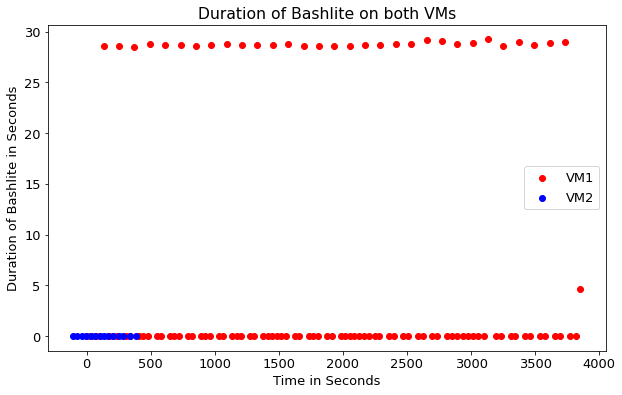

In [3]:

import matplotlib.pyplot as plt

bashliteDataWhole["startOfInfection"] = newTimeStart
bashliteDataWhole["duration"] = newDuration

bashliteDataVM1Both = bashliteDataWhole[bashliteDataWhole['machine'] == 'VM1']
bashliteDataVM2Both = bashliteDataWhole[bashliteDataWhole['machine'] == 'VM2']


print(bashliteDataVM1Both)
print(bashliteDataVM2Both)

fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(bashliteDataVM1Both['startOfInfection'], bashliteDataVM1Both['duration'], c="red")
ax.scatter(bashliteDataVM2Both['startOfInfection'], bashliteDataVM2Both['duration'], c=["blue"])
#red_mean = CPURAMdata[CPURAMdata['BashliteActive'] == True]['CPUPerc'].mean()
#yellow_mean = CPURAMdata[CPURAMdata['BashliteActive'] == False]['CPUPerc'].mean()


#ax.plot([bashliteDataWhole['time'].min(), bashbashliteDataWholeliteDataWhole['time'].max()], [red_mean, red_mean], color='red')
#ax.plot([bashliteDataWhole['time'].min(), CPURAMdata['time'].max()], [yellow_mean, yellow_mean], color='blue')
plt.legend(["VM1", "VM2"])
plt.title('Duration of Bashlite on both VMs')
plt.xlabel('Time in Seconds')
plt.ylabel('Duration of Bashlite in Seconds')


plt.show()



<ipython-input-4-add1fe91710d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bashliteDataVM2Both['duration'] = bashliteDataVM2Both['duration'].fillna(0)
<ipython-input-4-add1fe91710d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bashliteDataVM2Both['endOfInfection'] = bashliteDataVM2Both['endOfInfection'].fillna(0)


VM2 was never infected
The mean duration of both Infected is: 28.770346153846155


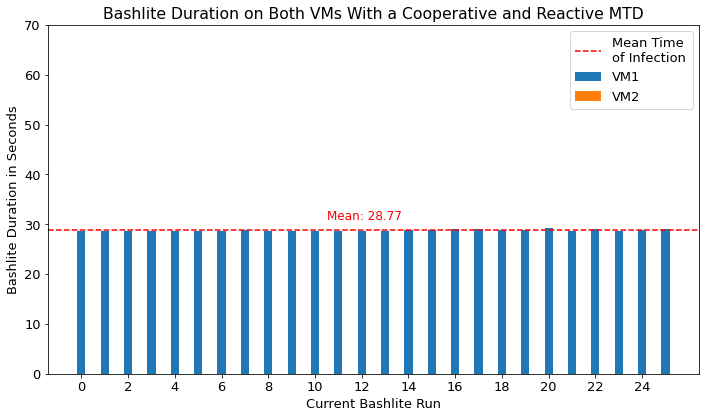

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def checkIfEverInfected(df):
    infected = False
    for value in df["count"]:
        if value != -1:
            infected = True
            break
            
    return infected

bashliteDataVM1Both = bashliteDataWhole[bashliteDataWhole['machine'] == 'VM1']
bashliteDataVM2Both = bashliteDataWhole[bashliteDataWhole['machine'] == 'VM2']

bashliteDataVM2Both['duration'] = bashliteDataVM2Both['duration'].fillna(0)
bashliteDataVM2Both['endOfInfection'] = bashliteDataVM2Both['endOfInfection'].fillna(0)




width = 0.35   

fig, ax = plt.subplots(figsize=(10,6))

if checkIfEverInfected(bashliteDataVM2Both):

    bashliteDataVM1Both = bashliteDataVM1Both[bashliteDataVM1Both["count"] != -1]
    bashliteDataVM2Both = bashliteDataVM2Both[bashliteDataVM2Both["count"] != -1]
    labelsBoth = bashliteDataVM1Both["count"]
    durationVM1Both = bashliteDataVM1Both['duration']
    durationVM2Both = bashliteDataVM2Both['duration']
    summedUPBoth = []
    count = 0
    firstRow = True
    for value in durationVM1Both:
        summedUPBoth.append(value + bashliteDataVM2Both.iloc[count,3])
        count+=1
    ax.bar(labelsBoth, durationVM2Both, width, bottom=durationVM1Both,label='VM2')
    
else:
    print("VM2 was never infected")
    bashliteDataVM1Both = bashliteDataVM1Both[bashliteDataVM1Both["count"] != -1]

    bashliteDataVM1Both = bashliteDataVM1Both.iloc[-27:-1]
    #print(bashliteDataVM1Both)
    labelsBoth = bashliteDataVM1Both["count"]
    durationVM1Both = bashliteDataVM1Both[bashliteDataVM1Both['duration'] > 10]
    durationVM1Both = durationVM1Both["duration"]
    #print(durationVM1Both)
    durationVM2Both = bashliteDataVM2Both['duration']
    summedUPBoth = []
    count = 0
    firstRow = True
    for value in durationVM1Both:
        summedUPBoth.append(value + 0)
        count+=1
        
    
labelsBoth = [i for i in range(0,len(durationVM1Both))]
        
   
    

meanBoth = np.mean(summedUPBoth)
print(f"The mean duration of both Infected is: {meanBoth}")

ax.bar(labelsBoth, durationVM1Both, width)
ax.bar(labelsBoth, [0], width)


ax.axhline(meanBoth, color='r', linestyle='--', label='Mean time of Infection')
ax.text(10.5, 31, 'Mean: {:.2f}'.format(meanBoth), fontsize=12, color='r')
plt.ylim(0, 70)
plt.xticks(range(0, 26, 2))
plt.title('Bashlite Duration on Both VMs With a Cooperative and Reactive MTD')
plt.xlabel('Current Bashlite Run')
ax.legend(["Mean Time \nof Infection","VM1","VM2"])
plt.ylabel('Bashlite Duration in Seconds')


plt.tight_layout()

filename = "bashliteDurationCoopAndReactive.png"
plt.savefig(os.path.join(path,filename),dpi= 800)
plt.show()

<h2>Code for IP change alone</h2>

In [5]:

bashliteDataVM1OnlyIP = pd.read_csv('bashliteDataVM1OnlyIP.txt')
bashliteDataVM1OnlyIP["machine"] = "VM1"


#print(bashliteDataVM1OnlyIP)
bashliteDataVM2OnlyIP = pd.read_csv('bashliteDataVM2OnlyIP.txt')
bashliteDataVM2OnlyIP["machine"] = "VM2"
#print(bashliteDataVM2OnlyIP)



bashliteDataWholeOnlyIP = bashliteDataVM1OnlyIP.append(bashliteDataVM2OnlyIP, ignore_index=True)
bashliteDataWholeOnlyIP['duration'] = bashliteDataWholeOnlyIP['duration'].fillna(0)

bashliteDataWholeOnlyIP['endOfInfection'] = bashliteDataWholeOnlyIP['endOfInfection'].fillna(0)
#print(bashliteDataWholeOnlyIP)

In [6]:
from datetime import datetime

newTimeStart = []
newTimeEnd = []
newDuration = []

def getSeconds(timeValue):
    #print(timeValue)
    timeArray = timeValue.split(":")
    numSeconds = int(timeArray[0])*3600 + int(timeArray[1]) * 60 + int(timeArray[2])
    return numSeconds
    
startTimeStart = getSeconds(bashliteDataWholeOnlyIP["startOfInfection"][0])
#startTimeEnd = getSeconds(bashliteDataWholeOnlyIP["endOfInfection"][0])


for i,timeValue in enumerate(bashliteDataWholeOnlyIP["startOfInfection"]):
    if timeValue != 0:
        timeDif = getSeconds(timeValue) - startTimeStart
        newTimeStart.append(timeDif)
"""
for i,timeValue in enumerate(bashliteDataWholeOnlyIP["endOfInfection"]):
    if timeValue != 0:
        timeDif = getSeconds(timeValue) - startTimeEnd
        newTimeEnd.append(timeDif)
"""
    
for i,timeValue in enumerate(bashliteDataWholeOnlyIP["duration"]):
    newTime = timeValue/1000
    newDuration.append(newTime)
    
#print(newTimeStart)
#print(newDuration)

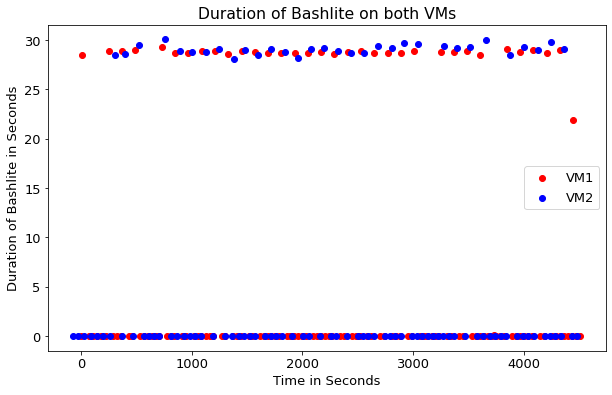

In [7]:


bashliteDataWholeOnlyIP["startOfInfection"] = newTimeStart
bashliteDataWholeOnlyIP["duration"] = newDuration

bashliteDataVM1OnlyIP = bashliteDataWholeOnlyIP[bashliteDataWholeOnlyIP['machine'] == 'VM1']
bashliteDataVM2OnlyIP = bashliteDataWholeOnlyIP[bashliteDataWholeOnlyIP['machine'] == 'VM2']
#print(bashliteDataWholeOnlyIP)

fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(bashliteDataVM1OnlyIP['startOfInfection'], bashliteDataVM1OnlyIP['duration'], c="red")
ax.scatter(bashliteDataVM2OnlyIP['startOfInfection'], bashliteDataVM2OnlyIP['duration'], c=["blue"])
#red_meanOnlyIP = CPURAMdata[CPURAMdata['BashliteActive'] == True]['CPUPerc'].meanOnlyIP()
#yellow_meanOnlyIP = CPURAMdata[CPURAMdata['BashliteActive'] == False]['CPUPerc'].meanOnlyIP()

#print(red_meanOnlyIP)
#print(yellow_meanOnlyIP)

#ax.plot([bashliteDataWholeOnlyIP['time'].min(), bashbashliteDataWholeOnlyIPliteDataWhole['time'].max()], [red_meanOnlyIP, red_meanOnlyIP], color='red')
#ax.plot([bashliteDataWholeOnlyIP['time'].min(), CPURAMdata['time'].max()], [yellow_meanOnlyIP, yellow_meanOnlyIP], color='blue')
plt.legend(["VM1", "VM2"])
plt.title('Duration of Bashlite on both VMs')
plt.xlabel('Time in Seconds')
plt.ylabel('Duration of Bashlite in Seconds')

# Show the plot
plt.show()



<class 'pandas.core.series.Series'>
<class 'list'>
26
26
The meanOnlyIP duration of both Infected is: 57.610423076923084


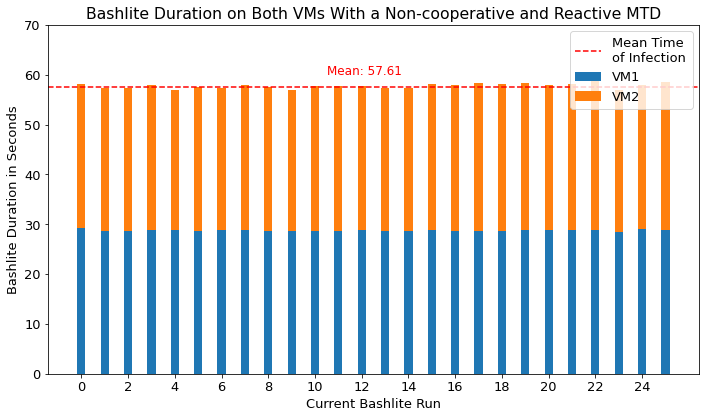

In [8]:
import matplotlib.pyplot as plt
import numpy as np


#print(bashliteDataWholeOnlyIP)


bashliteDataVM1OnlyIP = bashliteDataWholeOnlyIP[bashliteDataWholeOnlyIP['machine'] == 'VM1']
bashliteDataVM2OnlyIP = bashliteDataWholeOnlyIP[bashliteDataWholeOnlyIP['machine'] == 'VM2']



bashliteDataVM1OnlyIP = bashliteDataVM1OnlyIP[bashliteDataVM1OnlyIP["count"] != -1]
bashliteDataVM2OnlyIP = bashliteDataVM2OnlyIP[bashliteDataVM2OnlyIP["count"] != -1]


durationVM1OnlyIP = bashliteDataVM1OnlyIP['duration']
durationVM2OnlyIP = bashliteDataVM2OnlyIP['duration']
width = 0.35

fig, ax = plt.subplots(figsize=(10,6))




durationVM1OnlyIP = durationVM1OnlyIP.reset_index(drop=True)
durationVM2OnlyIP = durationVM2OnlyIP.reset_index(drop=True)
#print(durationVM1OnlyIP)

newdurationVM1OnlyIP = []
newdurationVM2OnlyIP = []

for index,val in enumerate(durationVM2OnlyIP):
    if val != 0:
        if durationVM1OnlyIP.iloc[index] > 10:
            newdurationVM2OnlyIP.append(val)
            #print(durationVM1OnlyIP.get(index))
            newdurationVM1OnlyIP.append(durationVM1OnlyIP.iloc[index])
            

newdurationVM1OnlyIP = newdurationVM1OnlyIP[-27:-1]
newdurationVM2OnlyIP = newdurationVM2OnlyIP[-27:-1]

        

newdurationVM1OnlyIP = pd.Series(newdurationVM1OnlyIP)
#threshold = 10
print(type(newdurationVM1OnlyIP))
print(type(newdurationVM2OnlyIP))
#newdurationVM1OnlyIP = newdurationVM1OnlyIP[newdurationVM1OnlyIP > threshold]
newdurationVM2OnlyIP = pd.Series(newdurationVM2OnlyIP)
    
print(len(newdurationVM1OnlyIP))
print(len(newdurationVM2OnlyIP))
labelsOnlyIP = [i for i in range(0, len(newdurationVM1OnlyIP))]
#print(labelsOnlyIP)

summedUP = []
count = 0
firstRow = True

for value in newdurationVM1OnlyIP:
    summedUP.append(value + newdurationVM2OnlyIP.iloc[0])
    count+=1
    
    
meanOnlyIP = np.mean(summedUP)
print(f"The meanOnlyIP duration of both Infected is: {meanOnlyIP}")
ax.text(10.5, 60, 'Mean: {:.2f}'.format(meanOnlyIP), fontsize=12, color='r')

ax.bar(labelsOnlyIP,newdurationVM1OnlyIP, width,label="VM1")
ax.bar(labelsOnlyIP,newdurationVM2OnlyIP, width, bottom=newdurationVM1OnlyIP,
       label='VM2')

ax.axhline(meanOnlyIP, color='r', linestyle='--', label='Mean Time \nof Infection')
plt.ylim(0, 70)
plt.xticks(range(0, 25, 2))
plt.title('Bashlite Duration on Both VMs With a Non-cooperative and Reactive MTD')
plt.xlabel('Current Bashlite Run')
plt.ylabel('Bashlite Duration in Seconds')
ax.legend(loc="upper right")


plt.tight_layout()
filename = "bashliteDurationUncoopAndReactive.png"
plt.savefig(os.path.join(path,filename),dpi= 800)

plt.show()

<h2>Code for Cooperative but Active</h2>

In [9]:

bashliteDataVM1BothActive = pd.read_csv('bashliteDataVM1BothActive.txt')
bashliteDataVM1BothActive["machine"] = "VM1"
print(bashliteDataVM1BothActive)

bashliteDataVM2BothActive = pd.read_csv('bashliteDataVM2BothActive.txt')
bashliteDataVM2BothActive["machine"] = "VM2"
print(bashliteDataVM2BothActive)



bashliteDataWholeBothActive = bashliteDataVM1BothActive.append(bashliteDataVM2BothActive, ignore_index=True)
bashliteDataWholeBothActive['duration'] = bashliteDataWholeBothActive['duration'].fillna(0)

bashliteDataWholeBothActive['endOfInfection'] = bashliteDataWholeBothActive['endOfInfection'].fillna(0)
print(bashliteDataWholeBothActive)

     count startOfInfection endOfInfection  duration machine
0       -1         11:51:35            NaN       NaN     VM1
1       -1         11:52:12            NaN       NaN     VM1
2       -1         11:52:50            NaN       NaN     VM1
3        0         11:52:59       11:53:03    3378.0     VM1
4       -1         11:53:26            NaN       NaN     VM1
..     ...              ...            ...       ...     ...
106     -1         12:52:29            NaN       NaN     VM1
107     -1         12:53:07            NaN       NaN     VM1
108     38         12:53:18       12:53:56   38509.0     VM1
109     -1         12:54:23            NaN       NaN     VM1
110     -1         12:54:59            NaN       NaN     VM1

[111 rows x 5 columns]
    count startOfInfection  endOfInfection  duration machine
0      -1         11:50:35             NaN       NaN     VM2
1      -1         11:51:21             NaN       NaN     VM2
2      -1         11:52:24             NaN       NaN     VM2


In [10]:
from datetime import datetime

newTimeStart = []
newTimeEnd = []
newDuration = []

def getSeconds(timeValue):
    timeArray = timeValue.split(":")
    numSeconds = int(timeArray[0])*3600 + int(timeArray[1]) * 60 + int(timeArray[2])
    return numSeconds
    
startTimeStart = getSeconds(bashliteDataWholeBothActive["startOfInfection"][0])
#startTimeEnd = getSeconds(bashliteDataWholeBothActive["endOfInfection"][0])


for i,timeValue in enumerate(bashliteDataWholeBothActive["startOfInfection"]):
    if timeValue != 0:
        timeDif = getSeconds(timeValue) - startTimeStart
        newTimeStart.append(timeDif)
"""
for i,timeValue in enumerate(bashliteDataWholeBothActive["endOfInfection"]):
    if timeValue != 0:
        timeDif = getSeconds(timeValue) - startTimeEnd
        newTimeEnd.append(timeDif)
"""
    
for i,timeValue in enumerate(bashliteDataWholeBothActive["duration"]):
    newTime = timeValue/1000
    newDuration.append(newTime)
    
print("newTimeStart", newTimeStart)
print("newDuration", newDuration)

newTimeStart [0, 37, 75, 84, 111, 146, 182, 188, 217, 253, 264, 288, 324, 335, 406, 441, 445, 476, 511, 515, 577, 634, 647, 707, 716, 781, 816, 852, 887, 922, 928, 958, 990, 1071, 1117, 1152, 1191, 1221, 1263, 1298, 1303, 1371, 1378, 1411, 1446, 1453, 1483, 1519, 1551, 1593, 1629, 1657, 1715, 1738, 1792, 1798, 1832, 1861, 1908, 1944, 1980, 2016, 2052, 2088, 2125, 2131, 2210, 2211, 2285, 2312, 2399, 2418, 2437, 2473, 2497, 2583, 2593, 2621, 2658, 2673, 2747, 2784, 2821, 2858, 2864, 2935, 2941, 2976, 3013, 3039, 3125, 3141, 3162, 3199, 3237, 3243, 3276, 3313, 3342, 3426, 3455, 3539, 3549, 3578, 3616, 3621, 3654, 3692, 3703, 3768, 3804, -60, -14, 49, 111, 166, 220, 278, 337, 394, 450, 505, 560, 616, 673, 731, 787, 843, 898, 954, 1010, 1067, 1126, 1182, 1237, 1287, 1344, 1401, 1455, 1512, 1568, 1622, 1677, 1732, 1791, 1849, 1907, 1962, 2013, 2069, 2122, 2180, 2235, 2290, 2345, 2406, 2460, 2513, 2567, 2620, 2674, 2732, 2786, 2839, 2896, 2953, 3009, 3064, 3118, 3174, 3228, 3282, 3334, 3390, 

     count  startOfInfection endOfInfection  duration machine
0       -1                 0              0     0.000     VM1
1       -1                37              0     0.000     VM1
2       -1                75              0     0.000     VM1
3        0                84       11:53:03     3.378     VM1
4       -1               111              0     0.000     VM1
..     ...               ...            ...       ...     ...
106     -1              3654              0     0.000     VM1
107     -1              3692              0     0.000     VM1
108     38              3703       12:53:56    38.509     VM1
109     -1              3768              0     0.000     VM1
110     -1              3804              0     0.000     VM1

[111 rows x 5 columns]
     count  startOfInfection endOfInfection  duration machine
111     -1               -60              0       0.0     VM2
112     -1               -14              0       0.0     VM2
113     -1                49              0   

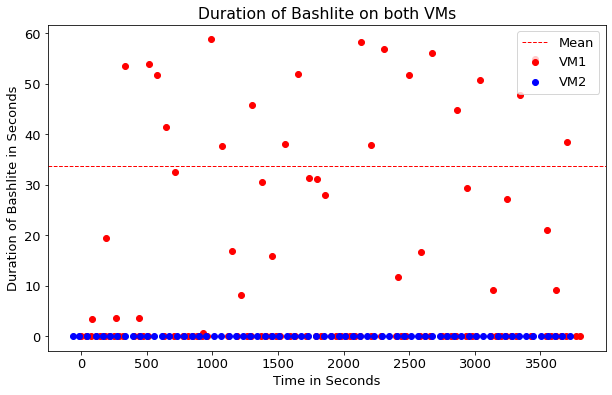

In [11]:

import matplotlib.pyplot as plt

bashliteDataWholeBothActive["startOfInfection"] = newTimeStart
bashliteDataWholeBothActive["duration"] = newDuration


bashliteDataVM1BothActive = bashliteDataWholeBothActive[bashliteDataWholeBothActive['machine'] == 'VM1']
bashliteDataVM2BothActive = bashliteDataWholeBothActive[bashliteDataWholeBothActive['machine'] == 'VM2']

print(bashliteDataVM1BothActive)
print(bashliteDataVM2BothActive)
fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(bashliteDataVM1BothActive['startOfInfection'], bashliteDataVM1BothActive['duration'], c="red")
ax.scatter(bashliteDataVM2BothActive['startOfInfection'], bashliteDataVM2BothActive['duration'], c=["blue"])

meanCount = 0
total = 0
helperArray = []
for i in newDuration:
    if i > 3 or i == 0:
        helperArray.append(i)
    if i > 3:
        meanCount+=1
        total += i


newDuration = helperArray
mean = total/meanCount
#print(mean)
print(f"The mean duration of both Infected in the active scenario is: {mean}")
        

plt.axhline(mean,color='red', linestyle='--', linewidth=1, label='Avg')
plt.legend(["Mean", "VM1", "VM2"])
plt.title('Duration of Bashlite on both VMs')
plt.xlabel('Time in Seconds')
plt.ylabel('Duration of Bashlite in Seconds')

plt.show()



VM2 was never infected
The mean duration of both Infected is: 33.879038461538464


<ipython-input-12-c8242bad32e9>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bashliteDataVM2BothActive['duration'] = bashliteDataVM2BothActive['duration'].fillna(0)
<ipython-input-12-c8242bad32e9>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bashliteDataVM2BothActive['endOfInfection'] = bashliteDataVM2BothActive['endOfInfection'].fillna(0)


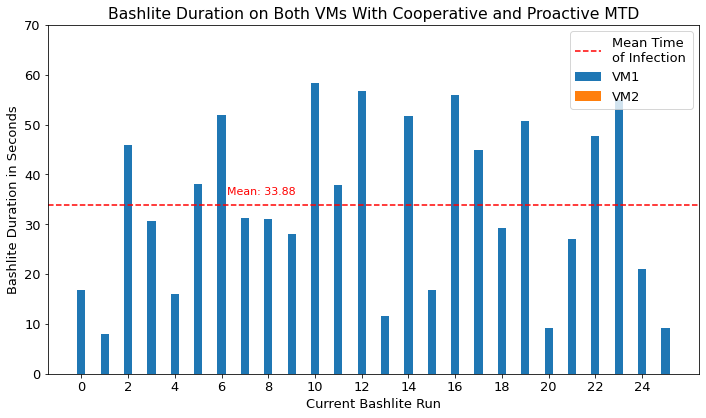

In [12]:

def checkIfEverInfected(df):
    infected = False
    for value in df["count"]:
        if value != -1:
            infected = True
            break
            
    return infected

bashliteDataVM1BothActive = bashliteDataWholeBothActive[bashliteDataWholeBothActive['machine'] == 'VM1']
bashliteDataVM2BothActive = bashliteDataWholeBothActive[bashliteDataWholeBothActive['machine'] == 'VM2']

bashliteDataVM2BothActive['duration'] = bashliteDataVM2BothActive['duration'].fillna(0)
bashliteDataVM2BothActive['endOfInfection'] = bashliteDataVM2BothActive['endOfInfection'].fillna(0)




width = 0.35   

fig, ax = plt.subplots(figsize=(10,6))

if checkIfEverInfected(bashliteDataVM2BothActive):

    bashliteDataVM1BothActive = bashliteDataVM1BothActive[bashliteDataVM1BothActive["count"] != -1]
    bashliteDataVM2BothActive = bashliteDataVM2BothActive[bashliteDataVM2BothActive["count"] != -1]
    labelsBothActive = bashliteDataVM1BothActive["count"]
    durationVM1Both = bashliteDataVM1BothActive['duration']
    durationVM2Both = bashliteDataVM2BothActive['duration']
    summedUPBothActive = []
    count = 0
    firstRow = True
    for value in durationVM1Both:
        summedUPBothActive.append(value + bashliteDataVM2BothActive.iloc[count,3])
        count+=1
    ax.bar(labelsBothActive, durationVM2Both, width, bottom=durationVM1Both,label='VM2')
    
else:
    print("VM2 was never infected")
    bashliteDataVM1BothActive = bashliteDataVM1BothActive[bashliteDataVM1BothActive["count"] != -1]
    labelsBothActive = bashliteDataVM1BothActive["count"]
    durationVM1Both = bashliteDataVM1BothActive[bashliteDataVM1BothActive['duration'] > 3]
    durationVM1Both = durationVM1Both.iloc[-27:-1]
    durationVM1Both = durationVM1Both["duration"]
    #print(durationVM1Both)
    durationVM2Both = bashliteDataVM2BothActive['duration']
    summedUPBothActive = []
    count = 0
    firstRow = True
    for value in durationVM1Both:
        summedUPBothActive.append(value + 0)
        count+=1
        
    
labelsBothActive = [i for i in range(0,len(durationVM1Both))]
        
   
    

meanBothActive = np.mean(summedUPBothActive)
print(f"The mean duration of both Infected is: {meanBothActive}")

ax.bar(labelsBothActive, durationVM1Both, width,label="VM1")
ax.bar(labelsBoth, [0], width, label="VM2")


ax.axhline(meanBothActive, color='r', linestyle='--', label='Mean Time \nof Infection')
ax.text(6.25, 36, 'Mean: {:.2f}'.format(meanBothActive), fontsize=11, color='r')
plt.ylim(0, 70)
plt.xticks(range(0, 25, 2))
plt.title('Bashlite Duration on Both VMs With Cooperative and Proactive MTD')
plt.xlabel('Current Bashlite Run')
plt.ylabel('Bashlite Duration in Seconds')
ax.legend(loc='upper right')

plt.tight_layout()
filename = "bashliteDurationCoopAndProactive.png"
plt.savefig(os.path.join(path,filename),dpi= 800)

plt.show()

<h2>All of them</h2>

57.610423076923084
28.770346153846155
33.879038461538464


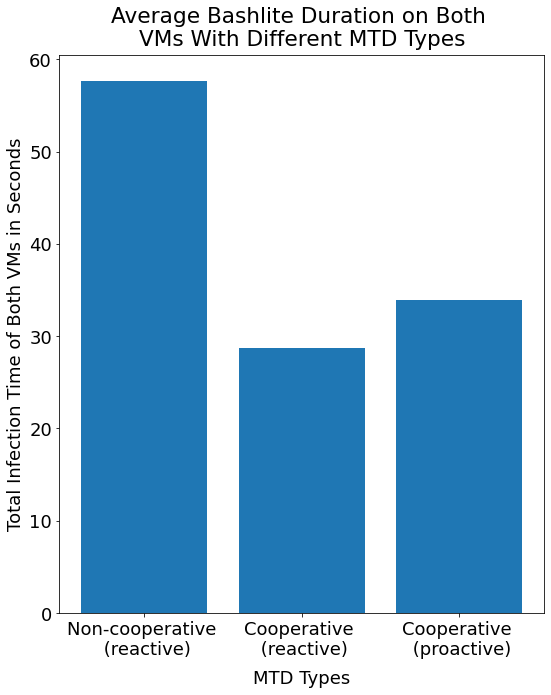

In [13]:
print(meanOnlyIP)
print(meanBoth)
print(meanBothActive)



width = 0.35   

font = {'size': 18}
plt.rc('font', **font)


fig, ax = plt.subplots(figsize=(8,10))
ax.bar(['Non-cooperative \n (reactive)', 'Cooperative \n (reactive)', 'Cooperative \n (proactive)'], [meanOnlyIP, meanBoth, meanBothActive])
plt.title('Average Bashlite Duration on Both \nVMs With Different MTD Types', pad=9)
plt.xlabel('MTD Types',labelpad=11)
plt.ylabel("Total Infection Time of Both VMs in Seconds")

filename = "bashliteDurationSummary.png"
plt.savefig(os.path.join(path,filename),dpi= 800)


plt.tight_layout()
plt.show()